In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [9]:
csv_file = "D:\Python\mlmed2025\data\\training_set_pixel_size_and_HC.csv"
df = pd.read_csv(csv_file)
print(f"Dataset size: {len(df)} samples")
df.head()

Dataset size: 999 samples


,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81


In [5]:
dataset_path = "D:\Python\mlmed2025\data\\training_set"
num_images = min(5, len(df))

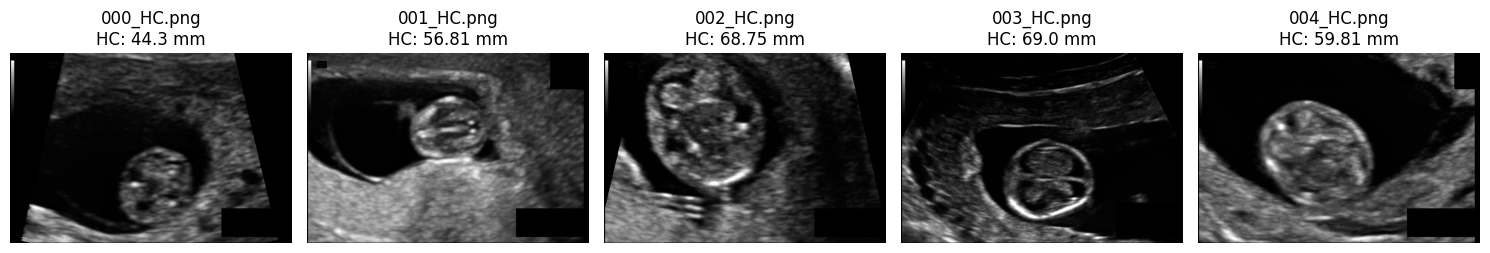

In [6]:
fig, axes = plt.subplots(1, num_images, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    img_path = os.path.join(dataset_path, df.iloc[i]['filename'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{df.iloc[i]['filename']}\nHC: {df.iloc[i]['head circumference (mm)']} mm")
    ax.axis("off")
plt.tight_layout()
plt.show()

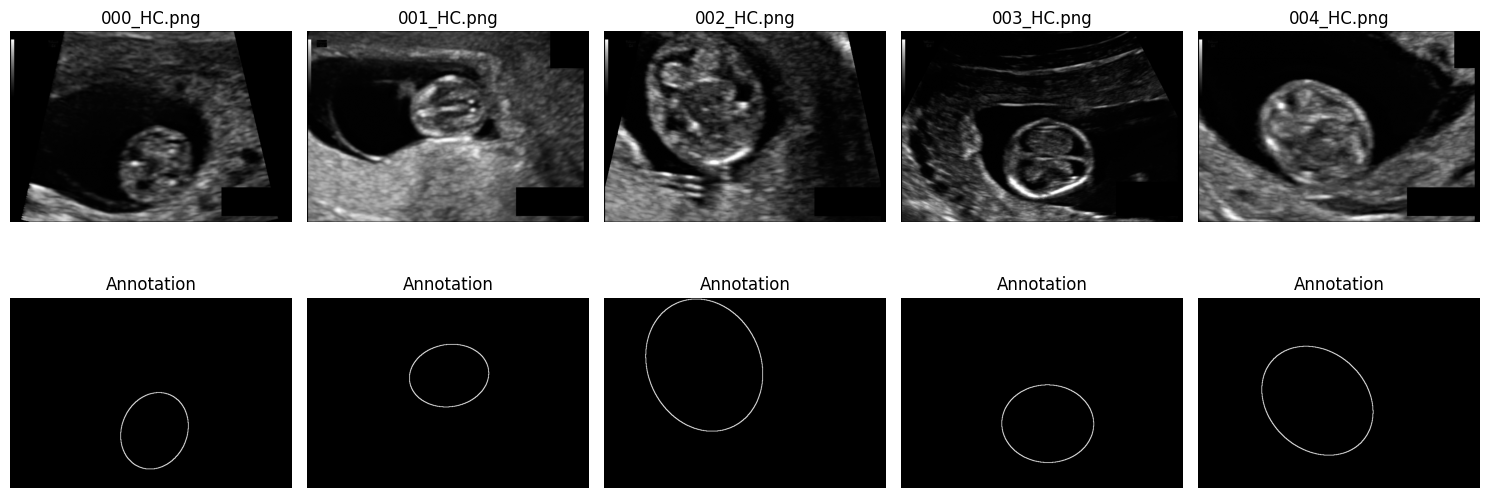

In [7]:
fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
for i in range(num_images):
    img_path = os.path.join(dataset_path, df.iloc[i]['filename'])
    annotation_path = img_path.replace(".png", "_Annotation.png")
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)
    
    axes[0, i].imshow(img, cmap="gray")
    axes[0, i].set_title(f"{df.iloc[i]['filename']}")
    axes[0, i].axis("off")
    
    axes[1, i].imshow(annotation, cmap="gray")
    axes[1, i].set_title("Annotation")
    axes[1, i].axis("off")
plt.tight_layout()
plt.show()

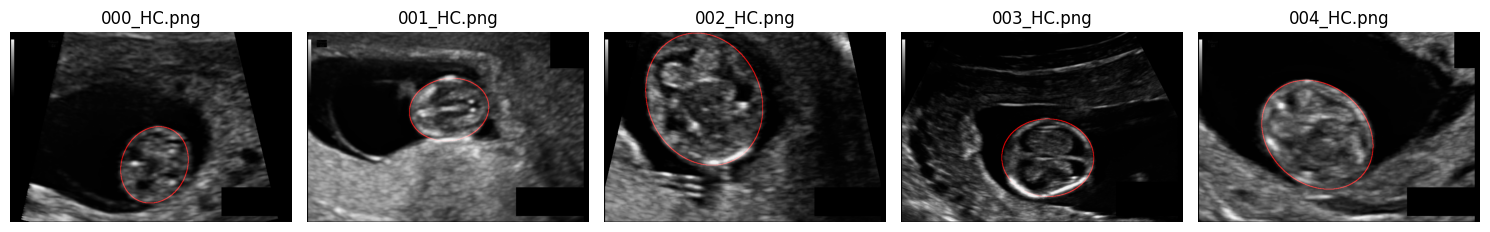

In [8]:
fig, axes = plt.subplots(1, num_images, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    img_path = os.path.join(dataset_path, df.iloc[i]['filename'])
    annotation_path = img_path.replace(".png", "_Annotation.png")
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)
    annotation_colored = cv2.cvtColor(annotation, cv2.COLOR_GRAY2BGR)
    annotation_colored[annotation > 0] = [255, 0, 0]
    overlay = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), 1, annotation_colored, 1, 0)
    
    ax.imshow(overlay)
    ax.set_title(f"{df.iloc[i]['filename']}")
    ax.axis("off")
plt.tight_layout()
plt.show()